# Isotropic elastic wave propagator

This tutorial was prepared by Eduardo Moscatelli emoscatelli@usp.br

This tutorial is an introduction to the isotropic elastic wave propagator. The tutorial is an adaption of the simple forward tutorial, so the reader may be interested in consulting the acoustic simple forward tutorial before reading this tutorial for more details on the passages that are not addressed in detail here. The objective is to show that several features of spyro are common between the solvers.

First, the notebook environment is configured and the required modules are impored.

In [1]:
%matplotlib inline
import spyro
import numpy as np

Then, the commands that are the same as in the acoustic example are run.

In [2]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 3.0,
        "Lx": 3.0,
        #"Ly": 0.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-1.1, 1.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 1.0,
        "dt": 0.001,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
}

The isotropic elastic wave propagator requires three parameters: the density and two parameters for the constitutive behavior. The user may choose between providing the density, the P-wave and S-wave velocities, or the density and the Lamé parameters ($\lambda$ and $\mu$). This tutorial follows the second option, so the synthetic data dictionary is set as follows.

In [3]:
dictionary["synthetic_data"] = {
    "type": "object",
    "density": 1.0,
    "lambda": 1.5,
    "mu": 1.0,
    "real_velocity_file": None,
}

The isotropic elastic solver of spyro implements a pure displacement formulation of the elastic problem. Therefore, the displacement vector is the output and the loads are vectors with one component per direction. The body forces of the elastic wave are set as follows.

In [4]:
dictionary["acquisition"]["amplitude"] = np.array([0, 1])

The class that implements the isotropic elastic wave propagator is the `IsotropicWave`. First, we create an instance of this class (the warning messages may be ignored).

In [5]:
wave = spyro.IsotropicWave(dictionary)

Parallelism type: automatic


/home/firedrake/shared/spyro/spyro/io/model_parameters.py:572: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/firedrake/shared/spyro/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


We set the mesh parameters to define a periodic mesh for this example.

In [6]:
wave.set_mesh(mesh_parameters={"dx": 0.02, "periodic": True})

Then, the wave propagation may start.

In [7]:
wave.forward_solve()

Saving output in: results/forward_outputsn0.pvd


/home/firedrake/firedrake/src/ufl/ufl/utils/sorting.py:89: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(f"Applying str() to a metadata value of type {type(value).__name__}, "
/home/firedrake/firedrake/src/ufl/ufl/utils/sorting.py:89: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(f"Applying str() to a metadata value of type {type(value).__name__}, "


Simulation time is:        0.0 seconds
Simulation time is:        0.1 seconds
Simulation time is:        0.2 seconds
Simulation time is:        0.3 seconds
Simulation time is:        0.4 seconds
Simulation time is:        0.5 seconds
Simulation time is:        0.6 seconds
Simulation time is:        0.7 seconds
Simulation time is:        0.8 seconds
Simulation time is:        0.9 seconds
Simulation time is:        1.0 seconds


The final displacement field may be visualized with the following function.

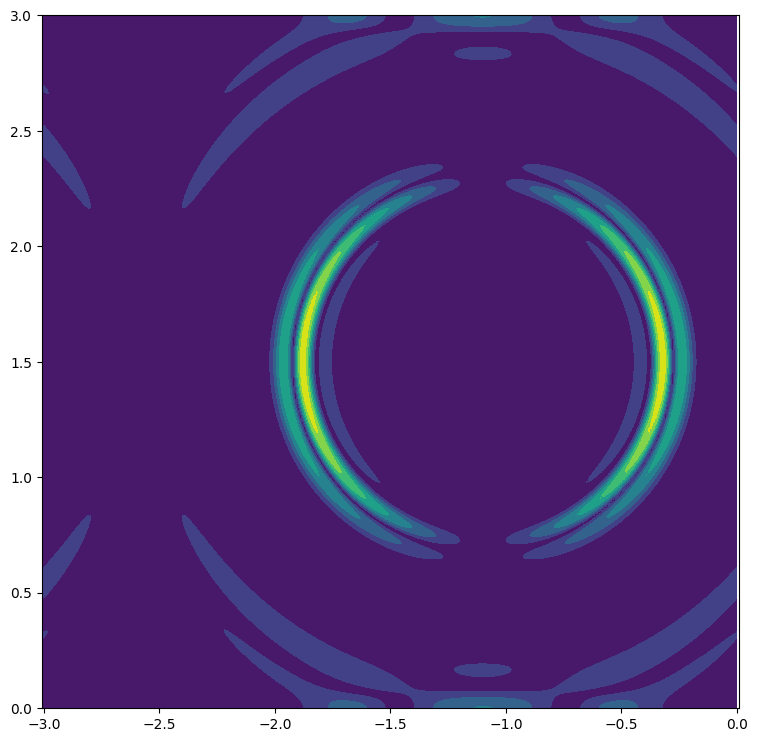

In [8]:
spyro.plots.plot_function(wave.u_n)